In [127]:
import torch
import torch.nn as nn
from utils.Gaussian_Map import gaussian_map
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

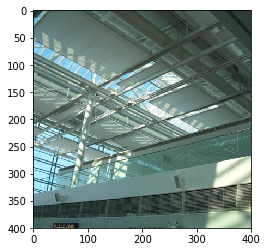

In [143]:
images = pd.read_json("allImages.json", orient="split")
image = io.imread('figrim/fillerData/' + images.loc[0,"impath"])
plt.imshow(image)

In [144]:
class Smoothing(nn.Module):
    def __init__(self, gpu=False):
        super(Smoothing, self).__init__()
        self.conv = nn.Conv2d(3, 3, 3, bias=False, padding=1)
        self.gpu = gpu
        weight = gaussian_map(torch.rand(3,3), 1, 1, self.gpu).view(1,1,3,3)
        weight = weight / torch.sum(weight)
        weight = weight.repeat(3,3,1,1)
        print(weight.size())
        self.conv.weight = torch.nn.Parameter(weight, requires_grad=False)
        print(self.conv.weight.size())
        print(self.conv.weight)
    
    def forward(self, x):
        return self.conv(x)

model = Smoothing(False)

torch.Size([3, 3, 3, 3])
torch.Size([3, 3, 3, 3])
Parameter containing:
tensor([[[[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]]],


        [[[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]]],


        [[[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]],

         [[0.0751, 0.1238, 0.0751],
        

In [145]:
# swap color axis because
# numpy image: H x W x C
# torch image: C X H X W
image = image.transpose((2, 0, 1))
print(image.shape)
#to tensor
image = torch.from_numpy(image)
#add batch-dimension
image = image.view(1,image.size(-3),image.size(-2),image.size(-1))
print(image.size())
#from byte to float
image = image.float()
print(torch.max(image))

(3, 400, 400)
torch.Size([1, 3, 400, 400])
tensor(255.)


In [146]:
output = model(image)
output.size()
output = output.view(3,output.size(-2),output.size(-1))
print(torch.max(output))
output = (output - torch.mean(output)) / torch.std(output)
print(torch.max(output))
output = output * 255
print(torch.max(output))
#back to numpy
output = output.numpy()
output = output.transpose((1, 2, 0))

tensor(762.3293)
tensor(2.9575)
tensor(754.1684)


In [116]:
print(image)

tensor([[[[ 59.,  56.,  47.,  ...,  43.,  43.,  43.],
          [ 55.,  45.,  39.,  ...,  43.,  43.,  43.],
          [ 49.,  35.,  31.,  ...,  43.,  43.,  43.],
          ...,
          [ 53.,  62.,  67.,  ..., 163., 158., 154.],
          [ 55.,  57.,  61.,  ..., 165., 159., 155.],
          [ 56.,  54.,  56.,  ..., 164., 159., 154.]],

         [[ 73.,  70.,  59.,  ...,  58.,  58.,  58.],
          [ 71.,  60.,  53.,  ...,  58.,  58.,  58.],
          [ 68.,  54.,  48.,  ...,  58.,  58.,  58.],
          ...,
          [ 87.,  96., 101.,  ..., 188., 183., 179.],
          [ 89.,  91.,  95.,  ..., 190., 184., 180.],
          [ 90.,  88.,  90.,  ..., 189., 184., 179.]],

         [[ 47.,  47.,  47.,  ...,  51.,  51.,  51.],
          [ 45.,  39.,  40.,  ...,  51.,  51.,  51.],
          [ 46.,  35.,  38.,  ...,  51.,  51.,  51.],
          ...,
          [ 88.,  97., 102.,  ..., 159., 154., 150.],
          [ 88.,  90.,  94.,  ..., 160., 154., 151.],
          [ 89.,  87.,  89.,  ...